# **ベイズモデル - Bayesian Model**

### **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

import os, sys
print('Current Directory: ', os.getcwd())

ROOT_PATH = '/content/drive/My Drive/Colab Notebooks/'
sys.path.append(ROOT_PATH)

Mounted at /content/drive/
Current Directory:  /content


#### **事前知識 : Keywords**
- **PDF** : Probability Density Function(確率密度関数)
- **PMF** : Probability Mass Function(確率質量関数)
- **CDF** : Cumulative Distribution Function(累積分布関数)

#### **公式ドキュメント: Reference**

- numpy > random > binominal
    - https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html
- scipy > optimize > fmin
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html

- scipy > rvs > uniform
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sampling.RatioUniforms.rvs.html

#### **目的 : 事後分布の推定 - Estimation for Posterior Distribution**

■ 手順
1. 自然共役事前分布の関係を使い解析的に求める
2. 分布を求めず, MAP推定で事後分布の最大点を点推定する
3. サンプリングによって数値的に求める

## **§1. 自然共役事前分布によるベイズ更新 - Natural Conjugate Prior Distribution**


- Bernoulli (pmf)
$$ P(X=x) = p^x(1-p)^{1-x} $$

- Beta (pdf)
$$ f(x; \alpha, \beta) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha, \beta)} $$

$$ B(\alpha, \beta) = \int_0^1 t^{\alpha-1} (1-t)^{\beta-1} dt $$

Successes 53
Failures 47


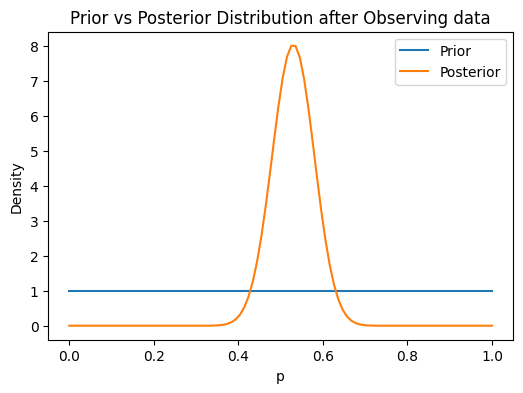

In [3]:
n = 1 # ベルヌーイ試行のための試行回数
p = 0.5 # 成功確率pを設定
size = 100 # サンプルサイズ

#ベルヌーイ分布に基づくサンプルデータを生成
samples = np.random.binomial(n, p, size) #（n, p, size=None)

# 事前確率分布をベータ分布とする
a, b = 1, 1  # 一様事前分布

# 事前確率分布を可視化
p_values = np.linspace(0, 1, 100)
prior_distribution = stats.beta.pdf(p_values, a, b)

# 成功回数と失敗回数を計算
successes = sum(samples)
failures = size - successes

print('Successes', successes)
print('Failures', failures)

# 事後分布のパラメータを更新
a_post = a + successes
b_post = b + failures

# 事後確率分布を可視化
posterior_distribution = stats.beta.pdf(p_values, a_post, b_post)

plt.figure(figsize=(6, 4))
plt.plot(p_values, prior_distribution, label='Prior')
plt.plot(p_values, posterior_distribution, label='Posterior')
plt.xlabel('p')
plt.ylabel('Density')
plt.title('Prior vs Posterior Distribution after Observing data')
plt.legend()
plt.show()
print()

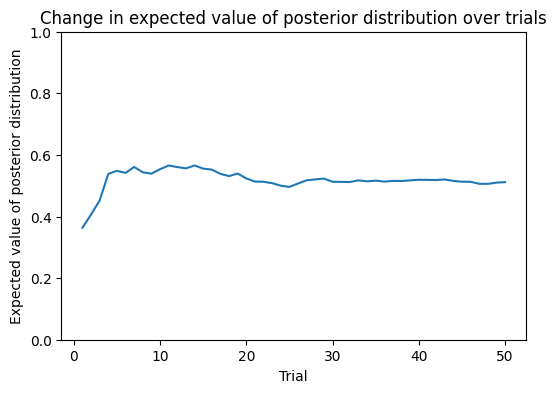

In [4]:
# 初期設定
n = 1  # ベルヌーイ試行のための試行回数
p = 0.5  # 成功確率pを設定
size = 10  # サンプルサイズ
a, b = 1, 1  # 一様事前分布

# サンプルデータを生成
samples = np.random.binomial(n, p, size)

# 成功回数と失敗回数を計算
successes = sum(samples)
failures = size - successes

# 事後分布のパラメータを初期化
a_post = a + successes
b_post = b + failures

# 事後確率分布の期待値を格納するリスト
expected_values = []

# 試行回数
trials = 50

for i in range(1, trials + 1):
    # 新たなサンプルデータを生成
    samples = np.random.binomial(n, p, size)
    successes = sum(samples)
    failures = size - successes

    # 事後分布のパラメータを更新
    a_post += successes
    b_post += failures

    # 事後分布の期待値を計算してリストに追加
    expected_value = a_post / (a_post + b_post)
    expected_values.append(expected_value)

# 試行回数に応じた事後分布の期待値の変化をプロット
plt.figure(figsize=(6, 4))
plt.plot(range(1, trials + 1), expected_values)
plt.ylim(0,1)
plt.xlabel('Trial')
plt.ylabel('Expected value of posterior distribution')
plt.title('Change in expected value of posterior distribution over trials')
plt.show()

## **§2. 最大事後確率の点推定 - MAP Estimation**
1. 最尤推定の定義式
$$
\theta_{\text{MLE}} = \arg\max_{\theta} \ L(\theta|D)
$$
2. 最大事後確率推定の定義式
$$
\theta_{\text{MAP}} = \arg\max_{\theta} \ P(\theta|D) = \arg\max_{\theta} \ \frac{P(D|\theta)P(\theta)}{P(D)}
$$

3. 無情報事前分布の例と意味
$$
\theta \sim N(0,100)
$$
$$
f(\theta) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(\theta - \mu)^2}{2\sigma^2}\right)
$$

$$
P(\theta) = c
$$

4. MAP推定 = 最尤推定
$$
\theta_{\text{MAP}} = \arg\max_{\theta} \ \frac{P(D|\theta)c}{P(D)} = \arg\max_{\theta} \ P(D|\theta)c
$$

$$
\theta_{\text{MAP}} = \arg\max_{\theta} \ P(D|\theta) = \theta_{\text{MLE}}
$$

5. 最尤推定 = 負の対数尤度（NLL）最小化問題
- Negative Log Likelihood

$$
\theta_{\text{MAP}} = \arg\max_{\theta} \ P(\theta|D) \quad \text{は無情報事前分布の場合} \quad \theta_{\text{MLE}} = \arg\max_{\theta} \ P(D|\theta)
$$

$$
\text{NLL}(\theta) = -\log P(D|\theta)
$$

$$
\text{NLL}(\theta) = -\sum_{i=1}^{n}\log P(x_i|\theta)
$$

$$
\theta_{\text{MLE}} = \arg\min_{\theta} \ \text{NLL}(\theta)
$$


,value
0,-1.190151
1,-1.664271
2,-0.209872
3,0.174666
4,-0.077223


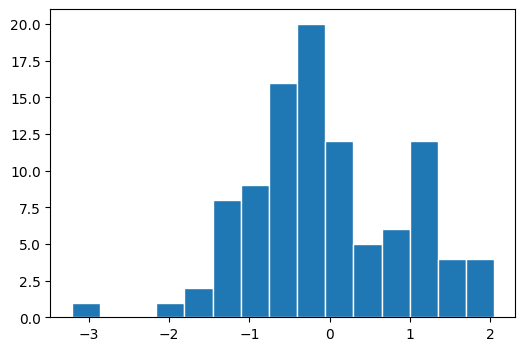

In [6]:
# データの読み込み
data = pd.DataFrame({'value':np.random.normal(0, 1, 100)}) # (mean, var, size)
display(data.head())
plt.figure(figsize=(6, 4))
plt.hist(data['value'], bins=15, edgecolor='white')
plt.show()

#### **正規分布のパラメータθを見つける**

In [7]:
from scipy import optimize

# 尤度関数の定義（負の対数尤度）
def likelihood(theta, data): # data: *argsとしてもよい
    # args[0]は、data["value"]から渡されたデータ配列
    likelihood = -np.log(stats.norm.pdf(data, loc=theta))
    return np.sum(likelihood) #sum: 対数を取ることで総積が総和になるため

# 最適化アルゴリズムによるパラメータ空間の探索
# result = optimize.minimize(目的関数, 初期値, args=(追加の引数,))
# 目的関数likelihoodをそのまま引数として渡している点に注意
result = optimize.minimize(likelihood, 1, args=(data["value"].values,))

# 結果の表示
print(result)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 138.54681990200635
        x: [-2.936e-02]
      nit: 2
      jac: [ 1.907e-06]
 hess_inv: [[ 1.000e-02]]
     nfev: 6
     njev: 3


## **§3. 数値解析シミュレーション - MCMCへ**


#### **3.1. 単位円を使ったシミュレーション**

In [8]:
#from IPython.html.widgets import interact
from ipywidgets import interact

#$ seedを固定
np.random.seed(111)

mcs = 100 # Monte Carlo Step
def monte_carlo_pi(mcs=100):
    np.random.seed(111)  # シードを固定
    x = np.random.rand(mcs)
    y = np.random.rand(mcs)

    r = np.sqrt(x**2 + y**2) #三平方の定理で距離が1より大きいか小さいかを考える
    dots_in_circle = np.where(r < 1, 1, 0)
    ratio_in_circle = np.sum(dots_in_circle) / mcs

    # 可視化
    plt.figure(figsize=(6, 6)) #正方形
    plt.scatter(x, y, c='#008080', alpha=0.5)
    circle = plt.Circle((0, 0), 1, color='#ffa500', fill=False)
    plt.gca().add_artist(circle)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.title(f'MCS: {mcs}, Ratio in circle: {ratio_in_circle:.3f}, Estimated Pi: {ratio_in_circle * 4:.3f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# 実行
interact(monte_carlo_pi, mcs=(1, 1000, 10))


interactive(children=(IntSlider(value=100, description='mcs', max=1000, min=1, step=10), Output()), _dom_class…

<function __main__.monte_carlo_pi(mcs=100)>

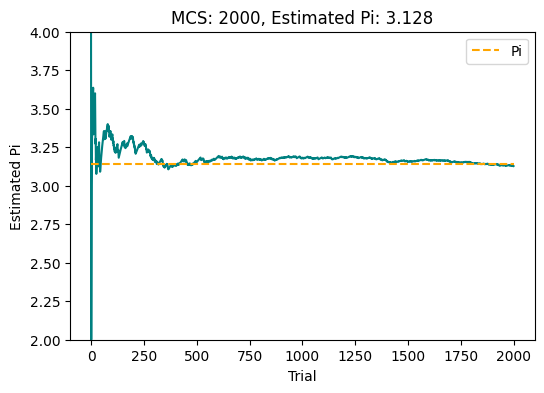

In [9]:
# シードを固定して再現性を確保
np.random.seed(1)

# モンテカルロステップ数
mcs = 2000

# 単位正方形内のランダムな点を生成
x = np.random.rand(mcs)
y = np.random.rand(mcs)

# πの推定値を格納するリスト
pi_list = []

# 各試行でπの推定値を計算
for trial in range(1, mcs + 1):
    r = (np.sqrt(x[:trial] ** 2 + y[:trial] **2))
    dots_in_circle = np.where(r < 1, 1, 0)
    ratio_in_circle = np.sum(dots_in_circle) / trial
    pi_list.append(ratio_in_circle * 4)

# 推定値の変化をプロット
plt.figure(figsize=(6, 4))
plt.plot(pi_list, color='#008080')
plt.xlabel('Trial')
plt.ylabel('Estimated Pi')
plt.ylim(2,4)
plt.title(f'MCS: {mcs}, Estimated Pi: {pi_list[-1]:.3f}')
plt.hlines(y=3.14, xmin=0, xmax=mcs, colors='#ffa500', linestyles='--', label='Pi')
plt.legend()
plt.show()

#### **3.2. 棄却サンプリング - Rejection Sampling**

- 提案分布で目標分布を覆うイメージ（単位円を覆う正方形と同様に）
- 目標分布$f(x)$から直接サンプリングする代わりに、提案分布$g(x)$からサンプリングし、サンプルを受け入れ/棄却を判定する.


$$ f(x) \leq M \ g(x)$$


    - 目標分布$f(x)$ : 実現値の分布
    - 提案分布$g(x)$ : 実現値の分布を覆う一様分布
    - 定数$M$ : 提案分布$g(x)$が目標分布$f(x)$を上回ることが許される最大の比率.

In [10]:
from scipy.stats import beta, uniform, norm
from scipy import optimize as optim

# PPF : Percent Point Function （累積分布関数（Cumulative Distribution Function, CDFの逆関数）
z = norm.ppf(0.05) #下側5%点となるzの値を求めることができる
print(z)

-1.6448536269514729


#### **3.2.1 MAP推定量の算出**

Optimization terminated successfully.
         Current function value: -1.443376
         Iterations: 13
         Function evaluations: 26


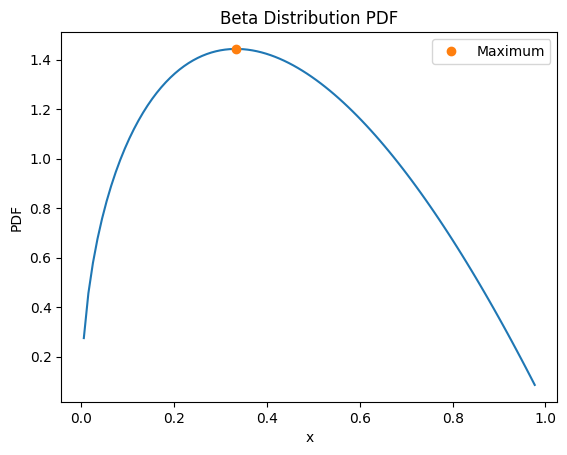

最適化による最大値のx座標: 0.33330
最適化によるPDF: 1.44338

解析解での最大PDF: 1.44329

MAP推定による最大値のx座標: 0.33333
MAP推定によるPDF: 1.44338


In [11]:
np.random.seed(111)
a = 1.5
b = 2.0

# ベータ分布の累積分布関数の逆関数(ppf)を使用して、特定の確率に対する分布の値の範囲を生成（厳密かつxの範囲が未知の時）
# ベータ分布の特性上, x=(0,1)なので x = np.linspace(0, 1, 100)でも可
x = np.linspace(beta.ppf(0.001, a, b), beta.ppf(0.999, a, b), 100)

# a, bをパラメータに持つベータ分布の確率密度関数(pdf)を使って, xの各連続点で確率密度を計算
y = beta.pdf(x, a, b)


# ベータ分布の確率密度関数を計算する関数
pdf_func = beta(a, b).pdf

# PDFの最大値を見つけるために最小化する関数
def neg_pdf(x):
    return -pdf_func(x)

initial = 0.5# 初期値
result = optim.fmin(neg_pdf, initial)  #fmin: シンプレックス法による最小化アルゴリズム, #disp=False: 最適化の途中経過を非表示
#neg_pdfの代わりに無名関数を使用する方法でもOK → result = optim.fmin(lambda x: -pdf_func(x), initial, disp=True)

# 最大値の計算
max_pdf = pdf_func(result)

plt.plot(x, y)
plt.plot(result, max_pdf, 'o', label='Maximum')
plt.title('Beta Distribution PDF')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()
plt.show()


mode = (a -1) / (a + b - 2) #a, b >1の時に限る
map = beta.pdf(mode, a, b)

print(f"最適化による最大値のx座標: {result[0]:.5f}")
print(f"最適化によるPDF: {max_pdf[0]:.5f}")
print()
print(f"解析解での最大PDF: {max(y):.5f}")
print()
print(f"MAP推定による最大値のx座標: {mode:.5f}")
print(f"MAP推定によるPDF: {map:.5f}")

#### **3.2.2. 棄却サンプリングの実行**
- 乱数を発生させる範囲や最終的にプロットしているグラフは2次元だが, 受容するかどうかの（一様乱数<ベータ分布の）比較は実際は1次元出であることに注意

Total iterations: 1466, Accepted samples: 1000, Accepted ratio: 0.682


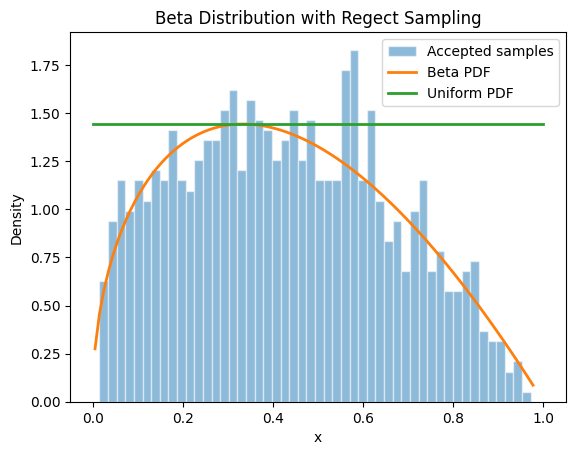

In [12]:
# 提案分布（一様分布）からのサンプル数
n_samples = 1000

# 棄却サンプリング
accepts = [] # 受容されたサンプル
trials = [] #全サンプル（受容 + 棄却）
iter = 0 #

while len(accepts) < n_samples:
    # 提案分布（一様分布）からサンプルを生成
    x_proposal = uniform.rvs(0, 1)
    y_proposal = uniform.rvs(0, max_pdf) #ベータ分布の最大値

    # ベータ分布の確率密度と比較
    if y_proposal < beta.pdf(x_proposal, a, b): #一様乱数のxを使っている
        accepts.append(x_proposal)
    trials.append(x_proposal)  # すべての試行を記録
    iter += 1

accepted_ratio = len(accepts) / iter

print(f"Total iterations: {iter}, Accepted samples: {len(accepts)}, Accepted ratio: {accepted_ratio:.3f}")


# 生成試行回数（受容 + 棄却）のヒストグラム
#plt.hist(trials, bins=50, density=True, alpha=0.2, edgecolor='white', label='All Trials') #density=Trueなので比率である点に注意

# 受容されたサンプルのヒストグラムをプロット
plt.hist(accepts, bins=50, density=True, alpha=0.5, edgecolor='white', label='Accepted samples') #density=Trueなので比率である点に注意

# ベータ分布のPDFをプロット
plt.plot(x, y, lw=2, label='Beta PDF')

# 一様分布のPDFをプロット
x_uniform = np.linspace(0, 1, 1000)
y_uniform = uniform.pdf(x_uniform) * max_pdf  # 一様分布の高さをベータ分布の最大値に合わせる
plt.plot(x_uniform, y_uniform, lw=2, label='Uniform PDF')


plt.title('Beta Distribution with Regect Sampling')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()


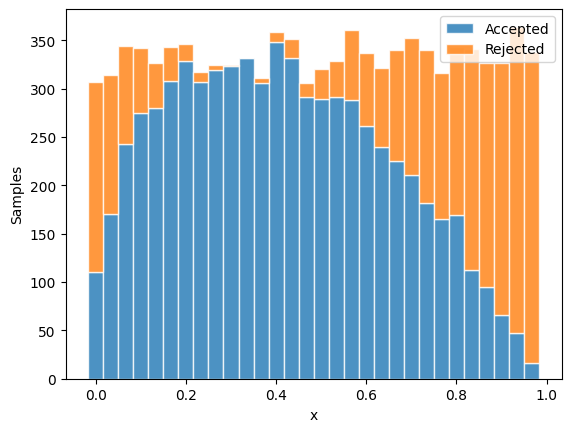

In [13]:
# パラメータ設定
np.random.seed(111)
a, b = 1.5, 2.0
n_trials = 10000
max_pdf = np.max(beta.pdf(np.linspace(0, 1, 1000), a, b))

# サンプル生成
samples = np.random.uniform(0, 1, size=n_trials)
y_values = np.random.uniform(0, max_pdf, size=n_trials)
accepted = samples[y_values < beta.pdf(samples, a, b)]
rejected = samples[y_values >= beta.pdf(samples, a, b)]

# ヒストグラムのビン設定
bins = np.linspace(0, 1, 31)

# 受容されたサンプルのヒストグラム
accept_hist, _ = np.histogram(accepted, bins=bins, density=False)

# 棄却されたサンプルのヒストグラム
reject_hist, _ = np.histogram(rejected, bins=bins, density=False)

# 積み上げ棒グラフの描画
plt.bar(bins[:-1], accept_hist, width=bins[1]-bins[0], label='Accepted', alpha=0.8, edgecolor='white')
plt.bar(bins[:-1], reject_hist, bottom=accept_hist, width=bins[1]-bins[0], label='Rejected', alpha=0.8, edgecolor='white')

plt.xlabel('x')
plt.ylabel('Samples')
plt.legend()
plt.show()


#### **3.3 マルコフ連鎖モンテカルロ法 - MCMC**

- 独立試行の棄却サンプリングでは次元の呪いにより, 高次元で値が発散 & ゼロに収束する
    - →MCMC(マルコフ連鎖モンテカルロ法）へ


- $d$次元ユークリッド空間における単位超立方体の辺の長さを$ \epsilon$としたとき、その体積$V$は,

$$V = \epsilon^d$$

- ここで、$d$が増加するにつれて、特定の体積を占めるために必要な$\epsilon$の値が指数関数的に小さくなる.
    - つまり、高次元空間では、データポイントが占める体積の割合が急速に減少する


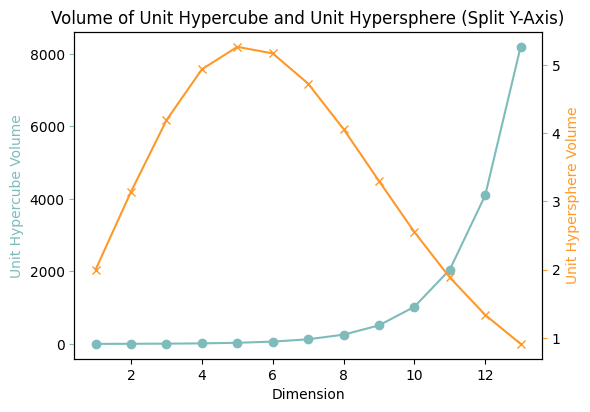

In [14]:
from scipy.special import gamma

# 次元数の範囲
dimensions = np.arange(1, 14, 1)

# 辺の長さε
epsilon = 2#（ここでは1辺を2としている）

# 立方体の各次元での体積を計算
volumes_hyper_cube = epsilon ** dimensions

# 単位超球体の体積
volumes_hyper_sphere = np.pi**(dimensions / 2) / gamma(dimensions / 2 + 1)

# プロット
fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.set_xlabel('Dimension')

color="#7FBBBB"
ax1.set_ylabel('Unit Hypercube Volume', color=color)
ax1.plot(dimensions, volumes_hyper_cube, label='Unit Hypercube Volume', marker='o', color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()
color="#FE9929"
ax2.set_ylabel('Unit Hypersphere Volume', color=color)
ax2.plot(dimensions, volumes_hyper_sphere, label='Unit Hypersphere Volume', marker='x', color=color)
ax2.tick_params(axis='y', color=color)

fig.tight_layout()
plt.title('Volume of Unit Hypercube and Unit Hypersphere (Split Y-Axis)')
plt.show()

#### **3.3.1 確率推移行列と定常性**

In [15]:
transition_prob = np.zeros([3, 3])

transition_prob[0,0] = 0.1
transition_prob[0,1] = 0.3
transition_prob[0,2] = 0.6
transition_prob[1,0] = 0.5
transition_prob[1,1] = 0.1
transition_prob[1,2] = 0.4
transition_prob[2,0] = 0.2
transition_prob[2,1] = 0.1
transition_prob[2,2] = 0.7

iter = 10000
state = np.random.choice(3, 1)  # 初期状態
state_history = np.zeros(iter, dtype=int) # 状態の履歴を記録する配列

for i in range(iter):
    current_state = state[0]
    state_history[i] = current_state
    # 次の状態を選択
    state = np.random.choice(3, 1, p=transition_prob[current_state])

# 各状態の頻度を計算して定常分布を推定
stationary_distribution = np.bincount(state_history) / iter

print("定常分布の推定値:", stationary_distribution)

定常分布の推定値: [0.218  0.1452 0.6368]


#### **3.3.2 メトロポリスヘイスティング - Metropolis-Hastings**

- 1. 提案分布の定義
$$q(\theta'|\theta)$$

- 2. ランダムウォークの定義
$$ \theta' = \theta + \epsilon, \ \epsilon \sim \text{Normal}(0,1)$$

- 3. ランダムウォークによる提案分布
$$q(\theta|\theta') = q(\theta'|\theta)$$

- 4. 本来満たすべき詳細つり合い関係式
$$f(\theta)q(\theta|\theta') = f(\theta')q(\theta'|\theta)$$

- 5. 受容確率(Accept Rate)の算出
\begin{align}
A(\theta'|\theta) &= \min \left( 1, \frac{f(\theta')q(\theta|\theta')}{f(\theta)q(\theta'|\theta)} \right) \\
&= \min\left(1, \frac{f(\theta')}{f(\theta)}\right) \quad
\end{align}

- $f(\theta)$: 目標分布
- $q(\theta'|\theta)$: 現在の状態$\theta$から新しい状態$\theta'$への提案分布
- $q(\theta|\theta')$: 新しい状態$\theta'$から現在の状態$\theta$への逆提案


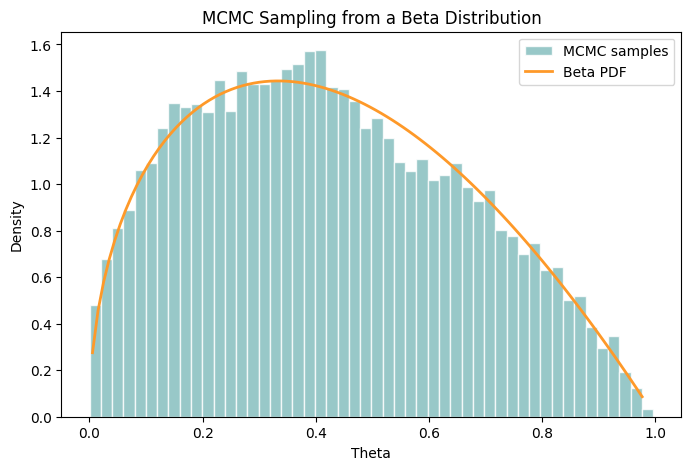

In [16]:
# パラメータ
np.random.seed(111)
a = 1.5
b = 2.0
mcs = 10000
theta = 0.7  # 初期状態
all_theta_list = [theta]  # thetaのサンプルを保存するリスト
sigma = 0.1 # 提案分布の標準偏差
x = np.linspace(beta.ppf(0.001, a, b), beta.ppf(0.999, a, b), 100)

# シミュレーション
for i in range(mcs):
    # ランダムウォークによる提案分布
    theta_prime = theta + norm.rvs(scale=sigma)

    # ベータ分布に基づく目標分布（確率密度）
    p_theta = beta.pdf(theta, a, b)
    p_theta_prime = beta.pdf(theta_prime, a, b)

    # 受容確率の計算
    # 提案分布が対称（正規分布）なので、q(theta'|theta)/q(theta|theta') = 1 として扱う
    accept_prob = min(1, p_theta_prime / p_theta)

    # 受容 or 棄却
    if np.random.rand() < accept_prob:
        theta = theta_prime  # 提案を受け入れる

    all_theta_list.append(theta)

# 可視化
plt.figure(figsize=(8, 5))
plt.hist(all_theta_list, bins=50, density=True, alpha=0.8, color='#7FBBBB', edgecolor='white', label='MCMC samples')
plt.plot(x, beta.pdf(x, a, b), color="#FE9929", lw=2, label='Beta PDF')
plt.xlabel('Theta')
plt.ylabel('Density')
plt.title('MCMC Sampling from a Beta Distribution')
plt.legend()
plt.show()

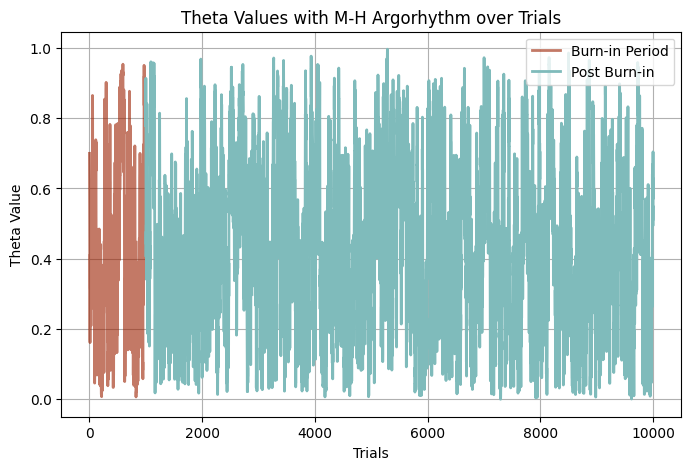

In [17]:
# burn-in期間
burn_in_period = 1000
burn_in = all_theta_list[:burn_in_period]

plt.figure(figsize=(8, 5))

# burn-in期間のデータをプロット
plt.plot(range(len(burn_in)), burn_in, color='#9B2000', alpha=0.6, lw=2, label='Burn-in Period')

# burn-in期間後のデータをプロット (x軸の値をオフセット)
plt.plot(range(burn_in_period, burn_in_period + len(all_theta_list[burn_in_period:])), all_theta_list[burn_in_period:], color='#7FBBBB', lw=2, label='Post Burn-in')

plt.title('Theta Values with M-H Argorhythm over Trials')
plt.xlabel('Trials')
plt.ylabel('Theta Value')
plt.grid(True)
plt.legend(loc="upper right")
plt.show()


## Fin